 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from itertools import product
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [6]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = [x.strip('$') for x in sp500_df.Close]
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()


Close    0
dtype: int64

In [13]:
# Rename Column
# YOUR CODE HERE
sp500_returns.columns = ['SP500']
sp500_returns.tail()

,SP500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

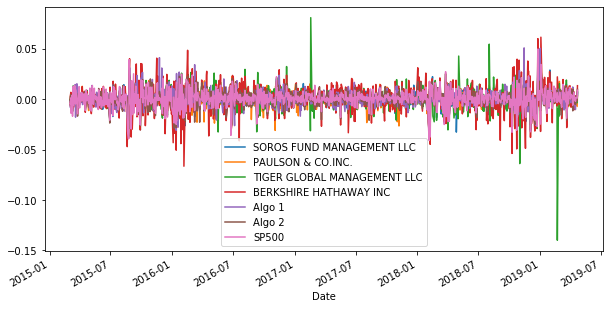

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(10,5))

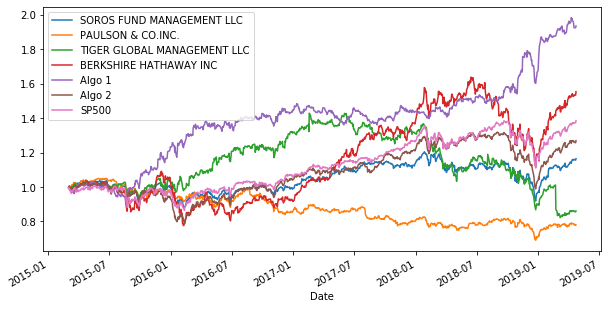

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(10,5))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

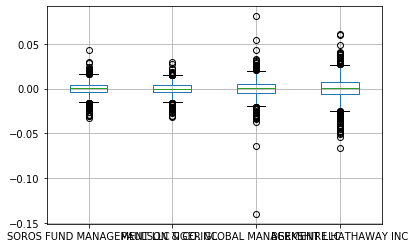

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
whale_df.boxplot()

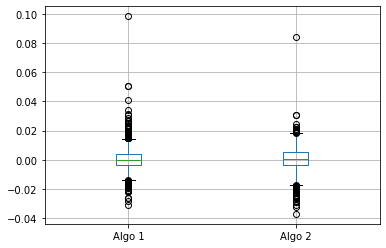

In [18]:
algo_df.boxplot()

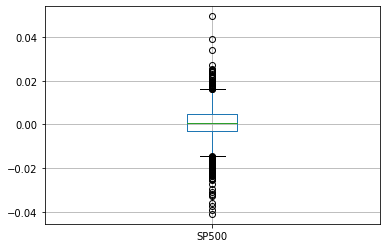

In [19]:
sp500_returns.boxplot()

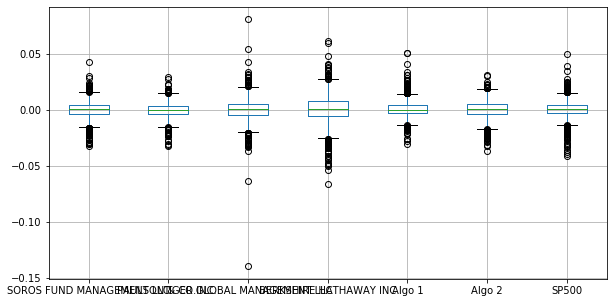

In [20]:
combined_df.boxplot(figsize=(10,5))

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

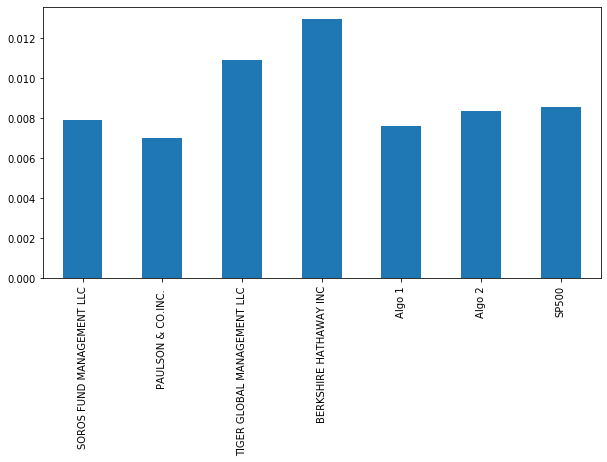

In [22]:
combined_std.plot(kind='bar', figsize=(10,5))

In [23]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combined_std = combined_std.sort_values()
combined_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [24]:
sp500 = combined_std['SP500']
riskier = combined_std > sp500

print(riskier)

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
SP500                          False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool


In [25]:
print('TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than the S&P500')

TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than the S&P500


In [26]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
combined_std_annualized =  combined_std * (252**.5)
combined_std_annualized

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

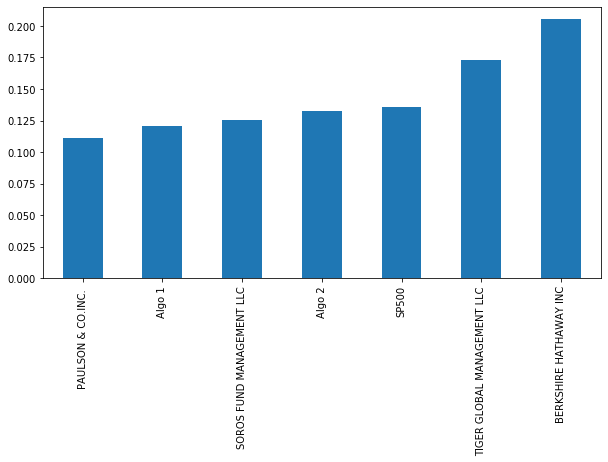

In [27]:
combined_std_annualized.plot(kind='bar', figsize=(10,5))

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

In [28]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_rolling = combined_df.rolling(window=21).std()
combined_rolling = combined_rolling.dropna()
combined_rolling.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.009105
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009095
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009114
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.009246
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008707


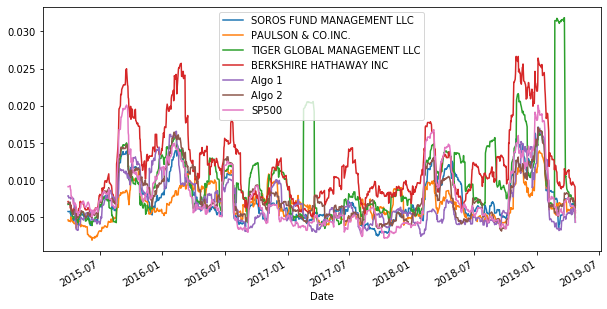

In [29]:
combined_rolling.plot(figsize=(10,5))

In [30]:
print('The Tiger Global deviation did not follow the SP500 or other porfilios at all.')

The Tiger Global deviation did not follow the SP500 or other porfilios at all.


In [31]:
# Construct a correlation table
# YOUR CODE HERE
combined_correlation = combined_df.corr()
combined_correlation.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494


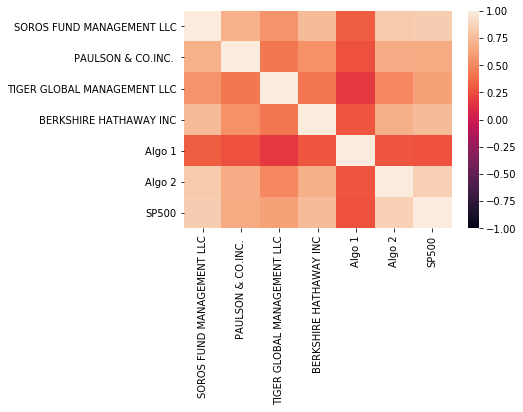

In [32]:
sns.heatmap(combined_correlation, vmin=-1, vmax=1)

In [33]:
print('Algo 1 is the least correlated')

Algo 1 is the least correlated


In [34]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
#Covariance of Algo1
covariance_algo1 = combined_df['Algo 1'].cov(combined_df['SP500'])

#Variance of Algo1
variance_algo1 = combined_df['Algo 1'].var()

#Beta of Algo1
beta_algo1 = covariance_algo1 / variance_algo1
beta_algo1


0.313734135114606

In [35]:
#Covariance of Algo2
covariance_algo2 = combined_df['Algo 2'].cov(combined_df['SP500'])

#Variance of Algo2
variance_algo2 = combined_df['Algo 2'].var()

#Beta of Algo2
beta_algo2 = covariance_algo2 / variance_algo2
beta_algo2

0.8805317114601035

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [36]:
# (OPTIONAL) YOUR CODE HERE
combined_ewm = combined_df.ewm(halflife=21).mean()
combined_ewm.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,0.001352
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,0.001234
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,0.001246
2019-04-22,0.001214,0.000009,-0.000971,0.001809,0.000516,0.000975,0.001238
2019-04-23,0.001407,0.000122,-0.000729,0.002182,0.000661,0.001256,0.001485


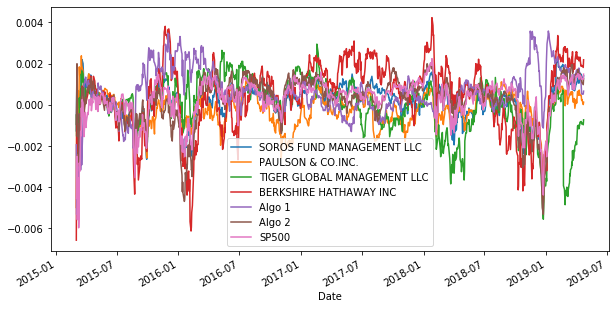

In [37]:
combined_ewm.plot(figsize=(10,5))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [38]:
# Annualized Sharpe Ratios
# YOUR CODE HERE 
sharpe_combined = combined_df.mean() / combined_df.std()
sharpe_combined

SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
Algo 1                         0.086847
Algo 2                         0.031583
SP500                          0.040837
dtype: float64

In [39]:
sharpe_annualized =  sharpe_combined * (252**.5)
sharpe_annualized

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

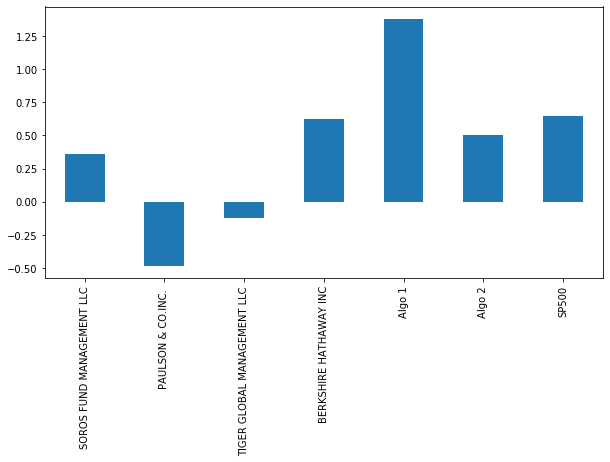

In [40]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_annualized.plot(kind='bar', figsize=(10,5))

In [41]:
print('Algo 1 vastly outperforms all porfolios, but Algo 2 underperforms the market and BERKSHIRE')

Algo 1 vastly outperforms all porfolios, but Algo 2 underperforms the market and BERKSHIRE


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [42]:
# Read the first stock
# YOUR CODE HERE
att_csv = Path("Resources/ATT.csv")
att_df = pd.read_csv(att_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
att_df.head()

,Close
Date,
2015-05-15,34.33
2015-05-18,34.87
2015-05-19,34.37
2015-05-20,34.62
2015-05-21,35.07


In [43]:
# Read the second stock
# YOUR CODE HERE
vz_csv = Path("Resources/vz.csv")
vz_df = pd.read_csv(vz_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
vz_df.head()

,Close
Date,
2015-05-15,49.79
2015-05-18,49.60
2015-05-19,49.55
2015-05-20,49.69
2015-05-21,49.90


In [44]:
# Read the third stock
# YOUR CODE HERE
tmus_csv = Path("Resources/TMUS.csv")
tmus_df = pd.read_csv(tmus_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
tmus_df.head()

,Close
Date,
2015-05-15,34.40
2015-05-18,34.83
2015-05-19,34.40
2015-05-20,35.21
2015-05-21,36.25


In [45]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
telecomm_df = pd.concat([att_df, vz_df, tmus_df], axis='columns', join='inner')
telecomm_df.columns = ['AT&T', 'Verizon', 'T-Mobile']
telecomm_df.tail()

,AT&T,Verizon,T-Mobile
Date,,,
2020-05-08,29.79,57.00,98.52
2020-05-11,29.38,56.40,96.72
2020-05-12,28.89,55.46,94.61
2020-05-13,28.09,54.85,92.78
2020-05-14,28.58,54.91,94.91


In [46]:
# Reset the index
# YOUR CODE HERE
#Done above

In [47]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
telecomm_pivot = telecomm_df.pivot
telecomm_pivot

<bound method DataFrame.pivot of              AT&T  Verizon  T-Mobile
Date                                
2015-05-15  34.33    49.79     34.40
2015-05-18  34.87    49.60     34.83
2015-05-19  34.37    49.55     34.40
2015-05-20  34.62    49.69     35.21
2015-05-21  35.07    49.90     36.25
...           ...      ...       ...
2020-05-08  29.79    57.00     98.52
2020-05-11  29.38    56.40     96.72
2020-05-12  28.89    55.46     94.61
2020-05-13  28.09    54.85     92.78
2020-05-14  28.58    54.91     94.91

[1258 rows x 3 columns]>

In [48]:
# Drop Nulls
# YOUR CODE HERE
telecomm_df = telecomm_df.dropna()
telecomm_df.isnull().sum()

AT&T        0
Verizon     0
T-Mobile    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
telecomm_returns = telecomm_df.pct_change()
telecomm_returns.head()

,AT&T,Verizon,T-Mobile
Date,,,
2015-05-15,NaN,NaN,NaN
2015-05-18,0.015730,-0.003816,0.012500
2015-05-19,-0.014339,-0.001008,-0.012346
2015-05-20,0.007274,0.002825,0.023547
2015-05-21,0.012998,0.004226,0.029537


In [50]:
telecomm_returns = telecomm_returns.dropna()
telecomm_returns.isnull().sum()

AT&T        0
Verizon     0
T-Mobile    0
dtype: int64

In [51]:
telecomm_portfolio = telecomm_returns.dot(weights)
telecomm_portfolio.head()

Date
2015-05-18    0.008138
2015-05-19   -0.009231
2015-05-20    0.011215
2015-05-21    0.015587
2015-05-22   -0.001405
dtype: float64

In [52]:
# telecomm_cumulative = (1 + telecomm_portfolio).cumprod()
# telecomm_cumulative

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_combined_df = pd.concat([telecomm_portfolio, whale_df, algo_df, sp500_returns], axis='columns', join='inner')
all_combined_df = all_combined_df.rename(columns = {0:'TeleComm'})
all_combined_df.tail()

,TeleComm,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2019-04-16,0.004249,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.016205,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.008269,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.002280,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,-0.006624,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_combined_df = all_combined_df.dropna()
all_combined_df.isnull().sum()

TeleComm                       0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

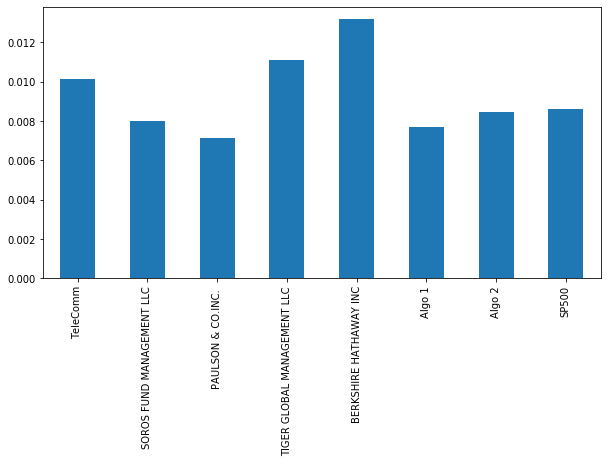

In [55]:
# Risk
# YOUR CODE HERE
all_combined_std = all_combined_df.std()
all_combined_std.plot(kind='bar', figsize=(10,5))

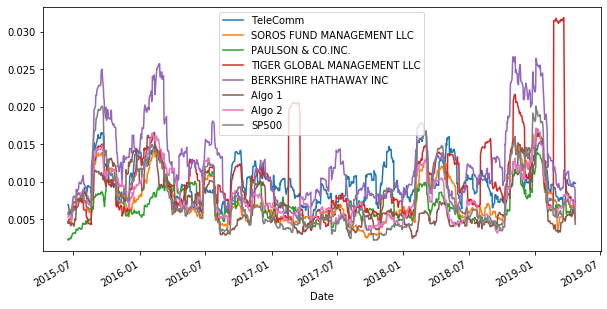

In [56]:
# Rolling
# YOUR CODE HERE
all_combined_rolling = all_combined_df.rolling(window=21).std()
all_combined_rolling = all_combined_rolling.dropna()
all_combined_rolling.plot(figsize=(10,5))

In [57]:
# Beta
# YOUR CODE HERE
#Covariance of Telecomm
covariance_telecomm = all_combined_df['TeleComm'].cov(all_combined_df['SP500'])

#Variance of Telecomm
variance_telecomm = all_combined_df['TeleComm'].var()

#Beta of Telecomm
beta_telecomm = covariance_telecomm / variance_telecomm
beta_telecomm

0.49936567271965715

In [58]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_all_combined = all_combined_df.mean() / all_combined_df.std()
sharpe_all_combined
sharpe_annualized_all =  sharpe_all_combined * (252**.5)
sharpe_annualized_all

TeleComm                       0.576195
SOROS FUND MANAGEMENT LLC      0.301038
PAULSON & CO.INC.             -0.584335
TIGER GLOBAL MANAGEMENT LLC   -0.146820
BERKSHIRE HATHAWAY INC         0.599974
Algo 1                         1.405186
Algo 2                         0.488988
SP500                          0.673719
dtype: float64

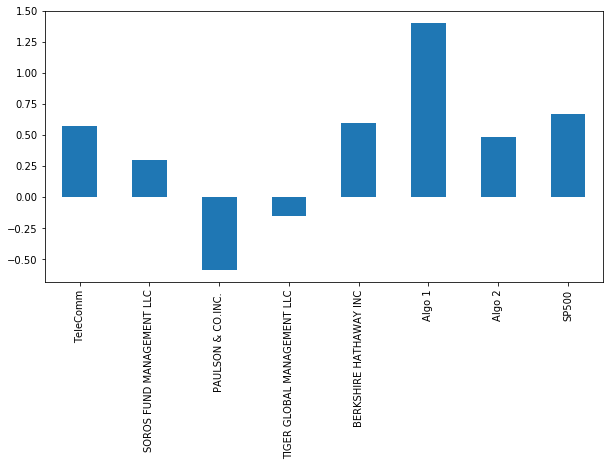

In [59]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_annualized_all.plot(kind='bar', figsize=(10,5))

## Include correlation analysis to determine which stocks (if any) are correlated

In [60]:
# YOUR CODE HERE
correlation_combined = all_combined_df.corr()
correlation_mean = correlation_combined.mean()
correlation_mean

TeleComm                       0.501058
SOROS FUND MANAGEMENT LLC      0.686579
PAULSON & CO.INC.              0.592124
TIGER GLOBAL MANAGEMENT LLC    0.520838
BERKSHIRE HATHAWAY INC         0.602564
Algo 1                         0.351132
Algo 2                         0.666169
SP500                          0.701931
dtype: float64

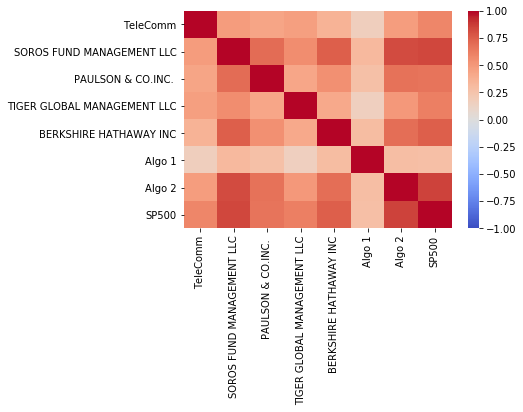

In [61]:
sns.heatmap(correlation_combined, vmin=-1, vmax=1, cmap='coolwarm')

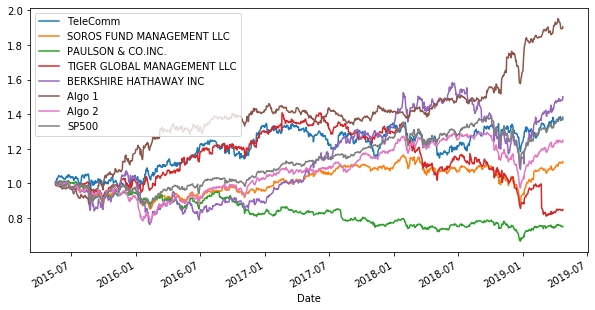

In [62]:
all_cumulative_returns = (1 + all_combined_df).cumprod()
all_cumulative_returns.plot(figsize=(10,5))

In [63]:
print('The three major Telecomm companies in the US are riskier than the market, but don\'t offer a greater return on investment. Algo 1 looks to follow the best investment strategy.')

The three major Telecomm companies in the US are riskier than the market, but don't offer a greater return on investment. Algo 1 looks to follow the best investment strategy.
